1. 货品图结构构建（例：货位图）

In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置支持中文的字体
rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
rcParams['axes.unicode_minus'] = False   # 解决负号显示问题

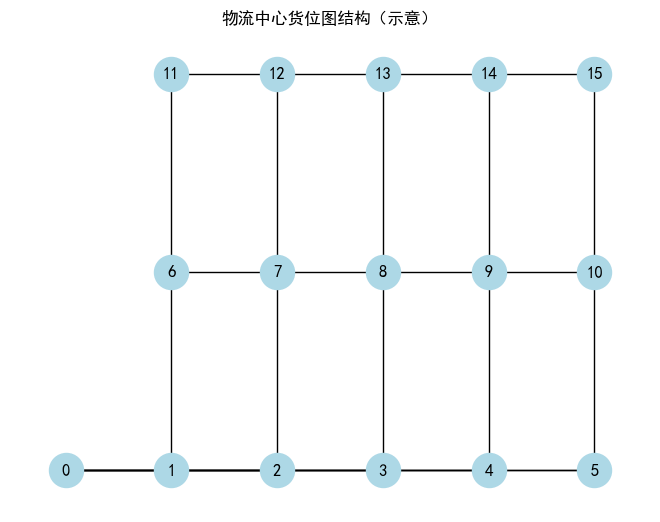

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# 模拟一个3层货架结构，每层5个货位，总15个货位，加一个入口节点
n_layers = 3
n_per_layer = 5
total_nodes = n_layers * n_per_layer
entry_node = 0  # 节点编号从1到15，0为入口

# 构建图结构：货位之间横向相连，不同层通过边连接（模拟电梯或主通道）
G = nx.Graph()
for i in range(1, total_nodes + 1):  # 节点编号从1开始
    G.add_node(i, pos=((i - 1) % n_per_layer, (i - 1) // n_per_layer))
    # 同层连接
    if (i - 1) % n_per_layer != n_per_layer - 1:
        G.add_edge(i, i + 1)
    # 跨层连接（垂直连接）
    if i + n_per_layer <= total_nodes:
        G.add_edge(i, i + n_per_layer)

# 入口点与第一层所有货位连接
for i in range(1, n_per_layer + 1):
    G.add_edge(entry_node, i)

G.add_node(entry_node, pos=(-1, 0))

# 可视化展示
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=600)
plt.title("物流中心货位图结构（示意）")
plt.show()

2. 构造量子游走初态与演化操作（以入口为源点）
我们将入口节点 entry_node 作为量子游走的起始位置。搜索目标将被标记（如 Uf 操作），使用量子干涉进行多轮演化，最后测量概率最高位置作为搜索结果。

In [7]:
import numpy as np
from scipy.linalg import expm

def create_basis_vector(index, size=10):
    """生成基向量"""
    vec = np.zeros((size, 1))
    vec[index] = 1
    return vec

def create_adjacency_matrix(connections, size=10):
    """生成邻接矩阵"""
    matrix = np.zeros((size, size))
    for i, j in connections:
        matrix[i, j] = matrix[j, i] = 1
    return matrix

def create_oracle(target, size=10):
    """生成目标标记的 Uf 算符"""
    vec = create_basis_vector(target, size)
    return np.eye(size) - 2 * vec @ vec.T

def quantum_walk(initial_state, adjacency_matrix, oracle, steps, size=10):
    """量子游走演化"""
    fuzhu = np.sin(0.5 * np.pi / (1 + 2 * steps))
    tnp = (2 / np.sqrt(size)) * np.arcsin(np.sqrt(size) * fuzhu)
    state = expm(-1j * adjacency_matrix * tnp * 0.5) @ initial_state
    evolution = np.eye(size, dtype=complex)
    for x in range(1, steps + 1):
        evolution = expm(-1j * adjacency_matrix * tnp * ((-1)**x)) @ oracle @ evolution
    return evolution @ state

# === 初始化基向量 ===
size = 10
yuansu = [create_basis_vector(i, size) for i in range(size)]

# === 第一步：搜索目标元素7 ===
connections_step1 = [(0, i) for i in range(1, 8)]  # 中心点0与外围点1-7连接
S1 = create_adjacency_matrix(connections_step1, size)
Uf1 = create_oracle(7, size)
initial_state_step1 = yuansu[0]
motai_step1 = quantum_walk(initial_state_step1, S1, Uf1, steps=2, size=10)
motai_step2 = quantum_walk(initial_state_step2, S2, Uf2, steps=2, size=10)
motai_step3 = quantum_walk(initial_state_step3, S3, Uf3, steps=2, size=10)

print("First step final state (motai_step1, aiming for yuansu7):\n", motai_step1)

# === 第二步：搜索目标元素9 ===
connections_step2 = [(7, 8), (7, 9), (7, 0)]  # 元素7与元素8、9和0连接
S2 = create_adjacency_matrix(connections_step2, size)
Uf2 = create_oracle(9, size)
initial_state_step2 = np.exp(1j * np.pi / 2) * yuansu[7] @ yuansu[7].T @ motai_step1
motai_step2 = quantum_walk(initial_state_step2, S2, Uf2, steps=2, size=3)

print("\nSecond step final state (motai_step2, aiming for yuansu9):\n", motai_step2)

# === 第三步：搜索目标元素5 ===
connections_step3 = [(9, 5), (9, 6), (9, 8)]  # 元素9与元素5、6和8连接
S3 = create_adjacency_matrix(connections_step3, size)
Uf3 = create_oracle(5, size)
initial_state_step3 = np.exp(1j * np.pi / 2) * yuansu[9] @ yuansu[9].T @ motai_step2
motai_step3 = quantum_walk(initial_state_step3, S3, Uf3, steps=2, size=3)

print("\nThird step final state (motai_step3, aiming for yuansu5):\n", motai_step3)


NameError: name 'initial_state_step2' is not defined